In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
threshold_values = {}
h = [1]

In [3]:
def Hist(img):
    row, col = img.shape
    y = np.zeros(256)
    for i in range(0, row):
        for j in range(0, col):
            y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width = 5, align= 'center', alpha=0.25)
    plt.show()
    return y    

In [4]:
def regenrate_img(img, threshold):
    row, col = img.shape
    y = np.zeros((row, col))
    for i in range(0, row):
        for j in range(0, col):
            if img[i, j] >= threshold:
                y[i, j] =255
            else:
                y[i,j] =0
    return y

In [5]:
def count_pixel(h):
    count = 0
    for i in range(0, len(h)):
        if h[i]>0:
            count += h[i]
    return count

In [6]:
def weight(s, e):
    w = 0
    for i in range(s, e):
        w+= h[i]
    return w

In [7]:
def mean(s, e):
    m = 0
    w = weight(s, e)
    for i in range(s, e):
        m+= h[i]*i
    return m/float(w)

In [8]:
def variance(s, e):
    v = 0
    m = mean(s, e)
    w = weight(s, e)
    for i in range(s, e):
        v += ((i-m)**2)*h[i]
    v /= w
    return v

In [13]:
def threshold(h):
    count = count_pixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = weight(0, i) /float(count)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = weight(i, len(h))/float(count)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w


In [14]:
def get_optimal_threshold():
    min_thresh = min(threshold_values.values())
    for key, value in threshold_values.items():
        if min_thresh == value:
            optimal = key
    return optimal

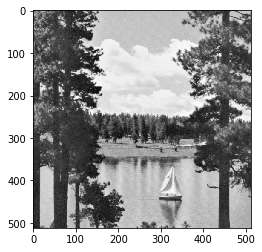

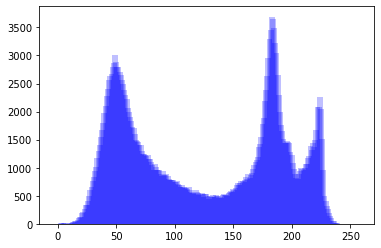

C:\Users\sutir\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


126


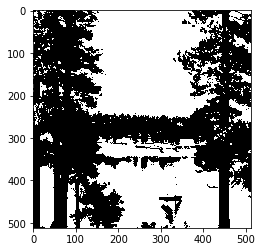

In [15]:
img = cv2.imread('misc\\4.2.06.tiff', 0) #main image
plt.imshow(img, cmap= 'gray')
plt.show()
img = np.asarray(img)
h = Hist(img)
threshold(h)
op_thresh = get_optimal_threshold()

print(op_thresh)
res = regenrate_img(img, op_thresh)
plt.imshow(res, cmap='gray')
plt.show()